<a href="https://colab.research.google.com/github/BisonV07/design_lab/blob/main/DESIGN_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: do you see the files uploaded

!ls -l


total 19580
-rw-r--r-- 1 root root  1009963 Mar 26 05:52 03_26_trip1_sensors.csv
-rw-r--r-- 1 root root   229022 Mar 26 05:52 03_26_trip2_sensors.csv
-rw-r--r-- 1 root root  1123031 Mar 26 05:53 04_02_trip1_sensors.csv
-rw-r--r-- 1 root root    47667 Mar 26 05:52 DESIGN_LAB.ipynb
-rw-r--r-- 1 root root   200651 Mar 26 05:52 merged_without_gyro.csv
-rw-r--r-- 1 root root  3629715 Mar 26 05:53 reduced_road_features_2percent.csv
-rw-r--r-- 1 root root 11013950 Mar 26 05:54 road_features.csv
drwxr-xr-x 1 root root     4096 Mar 24 13:34 sample_data
-rw-r--r-- 1 root root  2360346 Mar 26 05:53 sensor_with_gyro.csv
-rw-r--r-- 1 root root   199453 Mar 26 05:53 sensor_without_gyro.csv
-rw-r--r-- 1 root root       68 Mar 26 05:53 trip1_02-22-17_potholes.csv
-rw-r--r-- 1 root root    32677 Mar 26 05:53 trip1_02-22-17_sensors.csv
-rw-r--r-- 1 root root      101 Mar 26 05:53 trip2_02-22-17_potholes.csv
-rw-r--r-- 1 root root    76213 Mar 26 05:53 trip2_02-22-17_sensors.csv
-rw-r--r-- 1 root root   

In [2]:
import pandas as pd
import glob

# Define file names (Assuming files are in the same directory)
sensor_files = [
    "03_26_trip1_sensors.csv",
    "03_26_trip2_sensors.csv",
    "04_02_trip1_sensors.csv",
    "trip1_02-22-17_sensors.csv",
    "trip2_02-22-17_sensors.csv",
    "trip3_02-22-17_sensors.csv",
]

pothole_files = [
    "trip1_02-22-17_potholes.csv",
    "trip2_02-22-17_potholes.csv",
    "trip3_02-22-17_potholes.csv",
]

# Lists to store categorized data
sensor_with_gyro = []
sensor_without_gyro = []

# Load sensor data and categorize based on gyroscope presence
for file in sensor_files:
    df = pd.read_csv(file, encoding="utf-8", engine="python")

    if {"gyroX", "gyroY", "gyroZ"}.issubset(df.columns):
        sensor_with_gyro.append(df)  # Add to gyro group
    else:
        sensor_without_gyro.append(df)  # Add to non-gyro group

# Combine each group separately
sensor_with_gyro_df = pd.concat(sensor_with_gyro, ignore_index=True) if sensor_with_gyro else pd.DataFrame()
sensor_without_gyro_df = pd.concat(sensor_without_gyro, ignore_index=True) if sensor_without_gyro else pd.DataFrame()

# Load pothole data
pothole_dfs = [pd.read_csv(file, encoding="utf-8", engine="python") for file in pothole_files]
pothole_df = pd.concat(pothole_dfs, ignore_index=True) if pothole_dfs else pd.DataFrame()

# ✅ Compute statistics (Mean & Variance) for each group
if not sensor_with_gyro_df.empty:
    gyro_stats = sensor_with_gyro_df[["gyroX", "gyroY", "gyroZ"]].agg(["mean", "var"])
    print("\n✅ Gyroscope Data Statistics:")
    print(gyro_stats)

if not sensor_without_gyro_df.empty:
    accel_stats = sensor_without_gyro_df[["accelerometerX", "accelerometerY", "accelerometerZ"]].agg(["mean", "var"])
    print("\n✅ Accelerometer Data Statistics:")
    print(accel_stats)

# ✅ Fix timestamp type for merging
if not sensor_with_gyro_df.empty:
    sensor_with_gyro_df["timestamp"] = sensor_with_gyro_df["timestamp"].astype(float)

if not sensor_without_gyro_df.empty:
    sensor_without_gyro_df["timestamp"] = sensor_without_gyro_df["timestamp"].astype(float)

if not pothole_df.empty:
    pothole_df["timestamp"] = pothole_df["timestamp"].astype(float)

# ✅ Merge pothole data separately for both groups
merged_with_gyro = pd.merge(sensor_with_gyro_df, pothole_df, on="timestamp", how="outer") if not sensor_with_gyro_df.empty else pd.DataFrame()
merged_without_gyro = pd.merge(sensor_without_gyro_df, pothole_df, on="timestamp", how="outer") if not sensor_without_gyro_df.empty else pd.DataFrame()

# ✅ Save outputs as CSV (Optional)
sensor_with_gyro_df.to_csv("sensor_with_gyro.csv", index=False)
sensor_without_gyro_df.to_csv("sensor_without_gyro.csv", index=False)
merged_with_gyro.to_csv("merged_with_gyro.csv", index=False)
merged_without_gyro.to_csv("merged_without_gyro.csv", index=False)

# ✅ Print success message
print("\n🚀 Data successfully processed and saved!")



✅ Gyroscope Data Statistics:
         gyroX     gyroY     gyroZ
mean -0.027476 -0.006836 -0.016614
var   1.305936  1.320774  1.306125

✅ Accelerometer Data Statistics:
      accelerometerX  accelerometerY  accelerometerZ
mean        0.010357       -0.982846        0.170081
var         0.016795        0.013505        0.016996

🚀 Data successfully processed and saved!


In [3]:
import pandas as pd

# Define filenames of processed CSVs
filtered_files = [
    "sensor_with_gyro.csv",
    "sensor_without_gyro.csv",
    "merged_with_gyro.csv",
    "merged_without_gyro.csv",
]

# Print each dataset with proper formatting
for file in filtered_files:
    try:
        df = pd.read_csv(file)  # Read the filtered dataset
        print(f"\n🔹 {file} - First 5 Rows:\n")
        print(df.head())  # Print first 5 rows
        print("\n🔹 Summary:\n")
        print(df.info())  # Print column info
        print("\n🔹 Missing Values:\n")
        print(df.isnull().sum())  # Print missing values count
        print("=" * 50)  # Separator for better readability
    except Exception as e:
        print(f"\n⚠️ Error reading {file}: {e}")



🔹 sensor_with_gyro.csv - First 5 Rows:

      timestamp   latitude  longitude  speed  accelerometerX  accelerometerY  \
0  1.490542e+09  40.442152 -79.939125    0.0        0.069946       -0.955444   
1  1.490542e+09  40.442152 -79.939125    0.0        0.075745       -0.953049   
2  1.490542e+09  40.442152 -79.939125    0.0        0.075439       -0.953644   
3  1.490542e+09  40.442152 -79.939125    0.0        0.073151       -0.950409   
4  1.490542e+09  40.442152 -79.939125    0.0        0.052338       -0.962402   

   accelerometerZ       gyroX       gyroY       gyroZ  
0        0.280807 -100.000000 -100.000000 -100.000000  
1        0.251450   -0.017045    0.009625   -0.002960  
2        0.253555   -0.013865    0.006415   -0.004074  
3        0.248245   -0.011730   -0.001023    0.000147  
4        0.269684   -0.013839    0.013866   -0.004058  

🔹 Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15381 entries, 0 to 15380
Data columns (total 10 columns):
 #   Column         

In [4]:
!pip install scipy


Below code is generating features to classify as good road or bad road


In [5]:
import pandas as pd
import numpy as np
from collections import deque
from scipy.fft import fft, fftfreq

# Load sensor data (ensure timestamp is sorted)
df = pd.read_csv("sensor_with_gyro.csv")  # Modify as needed
df = df.sort_values(by="timestamp")  # Ensure data is time-ordered

# Define window size (assuming timestamp is in seconds)
WINDOW_SIZE = 1  # Seconds
FPS = 10  # Adjust based on your data sampling rate (e.g., 10Hz means 10 samples/sec)
WINDOW_LENGTH = WINDOW_SIZE * FPS  # Number of data points in a 2-sec window

# Initialize moving window queues
gyroX_queue = deque(maxlen=WINDOW_LENGTH)
gyroY_queue = deque(maxlen=WINDOW_LENGTH)
gyroZ_queue = deque(maxlen=WINDOW_LENGTH)
accelX_queue = deque(maxlen=WINDOW_LENGTH)
accelY_queue = deque(maxlen=WINDOW_LENGTH)
accelZ_queue = deque(maxlen=WINDOW_LENGTH)

# Function to compute time-domain features
def compute_time_features(data):
    return {
        "mean": np.mean(data),
        "variance": np.var(data),
        "std_dev": np.std(data),
        "max": np.max(data),
        "min": np.min(data)
    }

# Function to compute FFT features
def compute_fft_features(data, sampling_rate=FPS):
    if len(data) < WINDOW_LENGTH:
        return {"fft_peak_freq": 0, "fft_peak_amplitude": 0}  # Handle small windows

    # Compute FFT
    yf = np.abs(fft(data))  # Compute absolute FFT amplitudes
    xf = fftfreq(len(data), 1 / sampling_rate)  # Compute frequencies

    # Extract dominant frequency and amplitude
    peak_idx = np.argmax(yf[1:]) + 1  # Ignore DC component (index 0)
    return {
        "fft_peak_freq": xf[peak_idx],
        "fft_peak_amplitude": yf[peak_idx]
    }

# Process data using a moving window
feature_data = []

for i in range(len(df)):
    # Add new data to queues
    gyroX_queue.append(df.iloc[i]["gyroX"])
    gyroY_queue.append(df.iloc[i]["gyroY"])
    gyroZ_queue.append(df.iloc[i]["gyroZ"])
    accelX_queue.append(df.iloc[i]["accelerometerX"])
    accelY_queue.append(df.iloc[i]["accelerometerY"])
    accelZ_queue.append(df.iloc[i]["accelerometerZ"])

    # Ensure window is full before computing features
    if len(gyroX_queue) == WINDOW_LENGTH:
        # Compute time-domain and FFT features
        gyro_features = {
            "gyroX_" + key: val for key, val in compute_time_features(list(gyroX_queue)).items()
        }
        gyro_features.update({
            "gyroY_" + key: val for key, val in compute_time_features(list(gyroY_queue)).items()
        })
        gyro_features.update({
            "gyroZ_" + key: val for key, val in compute_time_features(list(gyroZ_queue)).items()
        })

        accel_features = {
            "accelX_" + key: val for key, val in compute_time_features(list(accelX_queue)).items()
        }
        accel_features.update({
            "accelY_" + key: val for key, val in compute_time_features(list(accelY_queue)).items()
        })
        accel_features.update({
            "accelZ_" + key: val for key, val in compute_time_features(list(accelZ_queue)).items()
        })

        # Compute FFT features
        fft_features = {
            "gyroX_" + key: val for key, val in compute_fft_features(list(gyroX_queue)).items()
        }
        fft_features.update({
            "gyroY_" + key: val for key, val in compute_fft_features(list(gyroY_queue)).items()
        })
        fft_features.update({
            "gyroZ_" + key: val for key, val in compute_fft_features(list(gyroZ_queue)).items()
        })
        fft_features.update({
            "accelX_" + key: val for key, val in compute_fft_features(list(accelX_queue)).items()
        })
        fft_features.update({
            "accelY_" + key: val for key, val in compute_fft_features(list(accelY_queue)).items()
        })
        fft_features.update({
            "accelZ_" + key: val for key, val in compute_fft_features(list(accelZ_queue)).items()
        })

        # Combine features
        feature_vector = {
            "timestamp": df.iloc[i]["timestamp"],
            **gyro_features,
            **accel_features,
            **fft_features
        }

        feature_data.append(feature_vector)

# Convert extracted features into a DataFrame
feature_df = pd.DataFrame(feature_data)

# Save features for model training
feature_df.to_csv("road_features.csv", index=False)

print("\n🚀 Feature extraction complete! Saved as 'road_features.csv'.")
print(feature_df.head())



🚀 Feature extraction complete! Saved as 'road_features.csv'.
      timestamp  gyroX_mean  gyroX_variance  gyroX_std_dev  gyroX_max  \
0  1.490542e+09  -10.013428      899.731463      29.995524  -0.011730   
1  1.490542e+09   -0.015134        0.000007       0.002687  -0.011730   
2  1.490542e+09   -0.014601        0.000008       0.002782  -0.011719   
3  1.490542e+09   -0.015132        0.000009       0.003081  -0.011719   
4  1.490542e+09   -0.015032        0.000010       0.003204  -0.010723   

    gyroX_min  gyroY_mean  gyroY_variance  gyroY_std_dev  gyroY_max  ...  \
0 -100.000000   -9.992199      900.156049      30.002601   0.013866  ...   
1   -0.021313    0.008763        0.000015       0.003887   0.013866  ...   
2   -0.021313    0.008442        0.000015       0.003935   0.013866  ...   
3   -0.021313    0.008446        0.000015       0.003933   0.013866  ...   
4   -0.021313    0.007804        0.000031       0.005597   0.013866  ...   

   gyroY_fft_peak_freq  gyroY_fft_peak_amp

next is I want to apply PCA to reduce features ( to eliminate features which contribute less than 2% variance )

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


feature_df = pd.read_csv("road_features.csv")

# Drop timestamp (since it's not a feature)
if "timestamp" in feature_df.columns:
    feature_df = feature_df.drop(columns=["timestamp"])

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print variance contribution of each component
print("\n🔹 PCA Explained Variance (% Contribution of Each Component):")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var:.2%}")

# Select components that contribute at least 2% variance
important_components = np.where(explained_variance >= 0.02)[0]  # Indices of important PCs
num_important_components = len(important_components)

print(f"\n✅ Keeping {num_important_components} components out of {len(explained_variance)} (≥2% variance)")

# Transform the data using only important components
pca = PCA(n_components=num_important_components)
reduced_features = pca.fit_transform(scaled_features)

# Convert reduced data back to DataFrame
reduced_feature_df = pd.DataFrame(reduced_features, columns=[f"PCA_Component_{i+1}" for i in range(num_important_components)])

# Save the reduced dataset
reduced_feature_df.to_csv("reduced_road_features_2percent.csv", index=False)

# Print summary
print("\n🚀 PCA completed! Reduced dataset saved as 'reduced_road_features_2percent.csv'.")
print("\n🔹 First 5 Rows of Reduced Feature Set:")
print(reduced_feature_df.head())



🔹 PCA Explained Variance (% Contribution of Each Component):
Component 1: 35.52%
Component 2: 26.43%
Component 3: 6.45%
Component 4: 4.63%
Component 5: 3.18%
Component 6: 2.96%
Component 7: 2.62%
Component 8: 2.53%
Component 9: 2.35%
Component 10: 2.27%
Component 11: 2.24%
Component 12: 2.08%
Component 13: 1.66%
Component 14: 1.21%
Component 15: 1.02%
Component 16: 0.83%
Component 17: 0.61%
Component 18: 0.31%
Component 19: 0.21%
Component 20: 0.20%
Component 21: 0.15%
Component 22: 0.12%
Component 23: 0.10%
Component 24: 0.09%
Component 25: 0.09%
Component 26: 0.05%
Component 27: 0.02%
Component 28: 0.02%
Component 29: 0.01%
Component 30: 0.01%
Component 31: 0.01%
Component 32: 0.00%
Component 33: 0.00%
Component 34: 0.00%
Component 35: 0.00%
Component 36: 0.00%
Component 37: 0.00%
Component 38: 0.00%
Component 39: 0.00%
Component 40: 0.00%
Component 41: 0.00%
Component 42: 0.00%

✅ Keeping 12 components out of 42 (≥2% variance)

🚀 PCA completed! Reduced dataset saved as 'reduced_roa

timestamps missing from pca data

The error occurs because the number of rows in sensor_with_gyro.csv does not match reduced_road_features_2percent.csv. This mismatch means we cannot directly reattach timestamps.

The row count mismatch is small:

PCA Features Dataset → 15,372 rows
Sensor with Gyro Dataset → 15,381 rows (extra 9 rows)
This suggests that some rows were dropped during PCA (likely due to missing values or outliers).

classifying potholes using 3 models , svm , rf and rnn

In [7]:
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

# ✅ Step 1: Load the Reduced Road Features Dataset
feature_df = pd.read_csv("reduced_road_features_2percent.csv")

# ✅ Step 2: Load Sensor Data to Retrieve Timestamps
sensor_files = [
    "trip1_02-22-17_sensors.csv",
    "trip2_02-22-17_sensors.csv",
    "trip3_02-22-17_sensors.csv",
    "03_26_trip1_sensors.csv",
    "03_26_trip2_sensors.csv",
    "04_02_trip1_sensors.csv",
]

sensor_dfs = [pd.read_csv(file) for file in sensor_files]
sensor_df = pd.concat(sensor_dfs, ignore_index=True)

# Align timestamps by keeping only the first N rows to match PCA features
feature_df["timestamp"] = sensor_df["timestamp"].iloc[:len(feature_df)].values

# ✅ Step 3: Load Pothole Data and Fix Timestamp Format
pothole_files = [
    "trip1_02-22-17_potholes.csv",
    "trip2_02-22-17_potholes.csv",
    "trip3_02-22-17_potholes.csv",
]

pothole_timestamps = set()
for file in pothole_files:
    pothole_data = pd.read_csv(file)
    pothole_timestamps.update(pothole_data["timestamp"].tolist())

# Convert timestamps to numpy arrays for fast lookup
feature_timestamps = feature_df["timestamp"].values.reshape(-1, 1)
pothole_timestamps_array = np.array(list(pothole_timestamps)).reshape(-1, 1)

# ✅ Step 4: Nearest Neighbor Matching for Pothole Labeling
tree = KDTree(feature_timestamps)
_, nearest_indices = tree.query(pothole_timestamps_array)

# Mark the matched timestamps as potholes
feature_df["pothole"] = 0  # Default to No Pothole
feature_df.loc[nearest_indices, "pothole"] = 1

# ✅ Step 5: Prepare Data for Training
X = feature_df.drop(columns=["timestamp", "pothole"])
y = feature_df["pothole"]

# ✅ Step 6: Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 7: Train SVM Model with Feature Scaling and Class Balancing
svm_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced"))

# Perform Cross-Validation (5-Fold)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy")

# Train the model on the full training set
svm_model.fit(X_train, y_train)

# ✅ Step 8: Evaluate Model Performance
test_accuracy = svm_model.score(X_test, y_test)

# ✅ Step 9: Save Trained Model
joblib.dump(svm_model, "svm_pothole_model.pkl")

# ✅ Step 10: Display Results
cv_results = pd.DataFrame({"Cross-Validation Scores": cv_scores})
test_result = pd.DataFrame({"Test Accuracy": [test_accuracy]})

# Print performance results
print("\n🚀 SVM Pothole Detection Model Trained Successfully!")
print(f"🔹 Test Accuracy: {test_accuracy:.2%}")
print("\n🔹 Cross-Validation Scores:")
print(cv_results)

# Save performance results as CSV
cv_results.to_csv("svm_cv_results.csv", index=False)
test_result.to_csv("svm_test_accuracy.csv", index=False)



🚀 SVM Pothole Detection Model Trained Successfully!
🔹 Test Accuracy: 89.66%

🔹 Cross-Validation Scores:
   Cross-Validation Scores
0                 0.931707
1                 0.915041
2                 0.912566
3                 0.908499
4                 0.913379


rf



🚀 Random Forest Pothole Detection Model Trained Successfully!
🔹 Test Accuracy: 99.64%

🔹 Cross-Validation Scores:
   Cross-Validation Scores
0                 0.996341
1                 0.996341
2                 0.996747
3                 0.996747
4                 0.996340

🔹 Confusion Matrix:
[[3064    0]
 [  11    0]]

🔹 Classification Report:
              precision    recall  f1-score   support

  No Pothole       1.00      1.00      1.00      3064
     Pothole       0.00      0.00      0.00        11

    accuracy                           1.00      3075
   macro avg       0.50      0.50      0.50      3075
weighted avg       0.99      1.00      0.99      3075



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


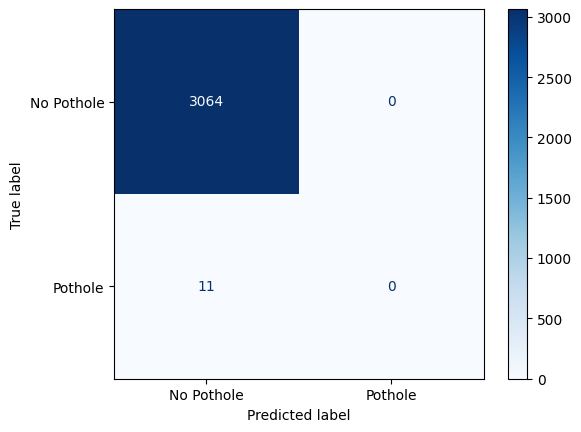

In [8]:
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

# ✅ Step 1: Load the Reduced Road Features Dataset
feature_df = pd.read_csv("reduced_road_features_2percent.csv")

# ✅ Step 2: Load Sensor Data to Retrieve Timestamps
sensor_files = [
    "trip1_02-22-17_sensors.csv",
    "trip2_02-22-17_sensors.csv",
    "trip3_02-22-17_sensors.csv",
    "03_26_trip1_sensors.csv",
    "03_26_trip2_sensors.csv",
    "04_02_trip1_sensors.csv",
]

sensor_dfs = [pd.read_csv(file) for file in sensor_files]
sensor_df = pd.concat(sensor_dfs, ignore_index=True)

# Align timestamps by keeping only the first N rows to match PCA features
feature_df["timestamp"] = sensor_df["timestamp"].iloc[:len(feature_df)].values

# ✅ Step 3: Load Pothole Data and Fix Timestamp Format
pothole_files = [
    "trip1_02-22-17_potholes.csv",
    "trip2_02-22-17_potholes.csv",
    "trip3_02-22-17_potholes.csv",
]

pothole_timestamps = set()
for file in pothole_files:
    pothole_data = pd.read_csv(file)
    pothole_timestamps.update(pothole_data["timestamp"].tolist())

# Convert timestamps to numpy arrays for fast lookup
feature_timestamps = feature_df["timestamp"].values.reshape(-1, 1)
pothole_timestamps_array = np.array(list(pothole_timestamps)).reshape(-1, 1)

# ✅ Step 4: Nearest Neighbor Matching for Pothole Labeling
tree = KDTree(feature_timestamps)
_, nearest_indices = tree.query(pothole_timestamps_array)

# Mark the matched timestamps as potholes
feature_df["pothole"] = 0  # Default to No Pothole
feature_df.loc[nearest_indices, "pothole"] = 1

# ✅ Step 5: Prepare Data for Training
X = feature_df.drop(columns=["timestamp", "pothole"])
y = feature_df["pothole"]

# ✅ Step 6: Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 7: Train Random Forest Model with Feature Scaling and Class Balancing
rf_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))

# Perform Cross-Validation (5-Fold)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# ✅ Step 8: Evaluate Model Performance
rf_test_accuracy = rf_model.score(X_test, y_test)

# ✅ Step 9: Save Trained Model
joblib.dump(rf_model, "rf_pothole_model.pkl")

# ✅ Step 10: Display Results
rf_cv_results = pd.DataFrame({"Cross-Validation Scores": rf_cv_scores})
rf_test_result = pd.DataFrame({"Test Accuracy": [rf_test_accuracy]})

# Print performance results
print("\n🚀 Random Forest Pothole Detection Model Trained Successfully!")
print(f"🔹 Test Accuracy: {rf_test_accuracy:.2%}")
print("\n🔹 Cross-Validation Scores:")
print(rf_cv_results)

# Save performance results as CSV
rf_cv_results.to_csv("rf_cv_results.csv", index=False)
rf_test_result.to_csv("rf_test_accuracy.csv", index=False)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ✅ Step 11: Make Predictions on the Test Set
y_pred = rf_model.predict(X_test)

# ✅ Step 12: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔹 Confusion Matrix:")
print(cm)

# Optional: Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Pothole", "Pothole"])
disp.plot(cmap="Blues")

# ✅ Step 13: Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Pothole", "Pothole"]))


the above confusion matrix results indicate the model always learns to classify as no pothole and failed to predict a single pothole correctly


In [9]:
pip install imbalanced-learn



✅ SMOTE applied. Class distribution after resampling:
pothole
0    12254
1    12254
Name: count, dtype: int64

🔹 Classification Report (Test Set):
              precision    recall  f1-score   support

  No Pothole       1.00      1.00      1.00      3064
     Pothole       0.00      0.00      0.00        11

    accuracy                           0.99      3075
   macro avg       0.50      0.50      0.50      3075
weighted avg       0.99      0.99      0.99      3075


🔹 Confusion Matrix:
[[3051   13]
 [  11    0]]

🚀 Random Forest Model with SMOTE training complete!


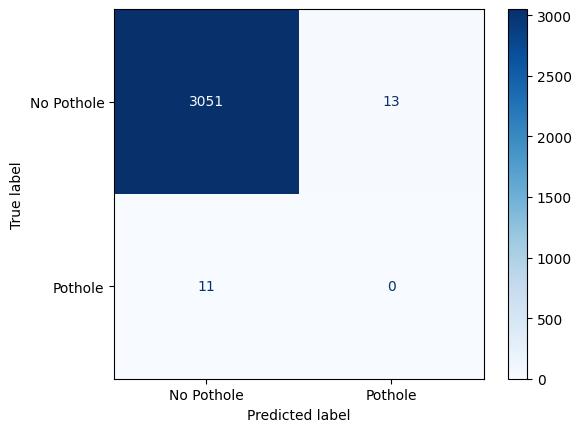

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import joblib

# ✅ Step 1: Load Reduced Feature Set with Timestamp & Labels
feature_df = pd.read_csv("reduced_road_features_2percent.csv")

# ✅ Step 2: Add timestamp and pothole labels (reuse code if needed)
sensor_files = [
    "trip1_02-22-17_sensors.csv",
    "trip2_02-22-17_sensors.csv",
    "trip3_02-22-17_sensors.csv",
    "03_26_trip1_sensors.csv",
    "03_26_trip2_sensors.csv",
    "04_02_trip1_sensors.csv",
]
sensor_dfs = [pd.read_csv(file) for file in sensor_files]
sensor_df = pd.concat(sensor_dfs, ignore_index=True)
feature_df["timestamp"] = sensor_df["timestamp"].iloc[:len(feature_df)].values

pothole_files = [
    "trip1_02-22-17_potholes.csv",
    "trip2_02-22-17_potholes.csv",
    "trip3_02-22-17_potholes.csv",
]
pothole_timestamps = set()
for file in pothole_files:
    pothole_data = pd.read_csv(file)
    pothole_timestamps.update(pothole_data["timestamp"].tolist())

from scipy.spatial import KDTree
feature_timestamps = feature_df["timestamp"].values.reshape(-1, 1)
pothole_timestamps_array = np.array(list(pothole_timestamps)).reshape(-1, 1)
tree = KDTree(feature_timestamps)
_, nearest_indices = tree.query(pothole_timestamps_array)
feature_df["pothole"] = 0
feature_df.loc[nearest_indices, "pothole"] = 1

# ✅ Step 3: Prepare Features and Labels
X = feature_df.drop(columns=["timestamp", "pothole"])
y = feature_df["pothole"]

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Step 5: Apply SMOTE on Training Set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n✅ SMOTE applied. Class distribution after resampling:")
print(pd.Series(y_train_smote).value_counts())

# ✅ Step 6: Build Random Forest Pipeline
rf_model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

# ✅ Step 7: Train with Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

# ✅ Step 8: Train on Full SMOTE Data
rf_model.fit(X_train_smote, y_train_smote)

# ✅ Step 9: Evaluate on Test Set
y_pred = rf_model.predict(X_test)

# ✅ Step 10: Evaluation Metrics
print("\n🔹 Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=["No Pothole", "Pothole"]))

print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Pothole", "Pothole"]).plot(cmap="Blues")

# ✅ Step 11: Save Model and Scores
joblib.dump(rf_model, "rf_pothole_model_with_smote.pkl")

pd.DataFrame({"Cross-Validation Scores": rf_cv_scores}).to_csv("rf_smote_cv_results.csv", index=False)
pd.DataFrame({"Test Accuracy": [rf_model.score(X_test, y_test)]}).to_csv("rf_smote_test_accuracy.csv", index=False)

print("\n🚀 Random Forest Model with SMOTE training complete!")



switching to RNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8378 - loss: 0.3700 - val_accuracy: 0.9556 - val_loss: 0.1484
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9546 - loss: 0.1564 - val_accuracy: 0.9654 - val_loss: 0.1198
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9679 - loss: 0.1105 - val_accuracy: 0.9626 - val_loss: 0.1096
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9672 - loss: 0.0930 - val_accuracy: 0.9703 - val_loss: 0.0777
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9792 - loss: 0.0586 - val_accuracy: 0.9858 - val_loss: 0.0440
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9861 - loss: 0.0479 - val_accuracy: 0.9878 - val_loss: 0.0354
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9903 - loss: 0.0335 - val_accuracy: 0.9902 - val_loss: 0.0310
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9885 - loss: 0.0337 - val_acc


🔹 Classification Report:
              precision    recall  f1-score   support

  No Pothole       1.00      1.00      1.00      2930
     Pothole       0.94      0.96      0.95       141

    accuracy                           1.00      3071
   macro avg       0.97      0.98      0.97      3071
weighted avg       1.00      1.00      1.00      3071


🔹 Confusion Matrix:
[[2921    9]
 [   6  135]]


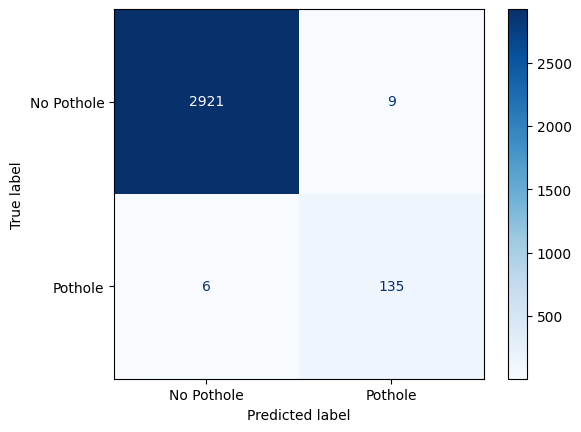

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.spatial import KDTree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load PCA-reduced features
features_df = pd.read_csv("reduced_road_features_2percent.csv")

# ✅ Reattach timestamps
sensor_files = [
    "trip1_02-22-17_sensors.csv",
    "trip2_02-22-17_sensors.csv",
    "trip3_02-22-17_sensors.csv",
    "03_26_trip1_sensors.csv",
    "03_26_trip2_sensors.csv",
    "04_02_trip1_sensors.csv",
]
sensor_df = pd.concat([pd.read_csv(file) for file in sensor_files], ignore_index=True)
features_df["timestamp"] = sensor_df["timestamp"].iloc[:len(features_df)].values

# ✅ Label potholes using nearest neighbor matching
pothole_files = [
    "trip1_02-22-17_potholes.csv",
    "trip2_02-22-17_potholes.csv",
    "trip3_02-22-17_potholes.csv",
]
pothole_timestamps = set()
for file in pothole_files:
    pothole_data = pd.read_csv(file)
    pothole_timestamps.update(pothole_data["timestamp"].tolist())

# KDTree for matching
feature_timestamps = features_df["timestamp"].values.reshape(-1, 1)
pothole_timestamps_array = np.array(list(pothole_timestamps)).reshape(-1, 1)
tree = KDTree(feature_timestamps)
_, nearest_indices = tree.query(pothole_timestamps_array)

# Attach labels
features_df["pothole"] = 0
features_df.loc[nearest_indices, "pothole"] = 1

# ✅ Prepare sequence data
SEQ_LEN = 20  # 2 seconds at 10Hz

X_seq, y_seq = [], []
pca_feature_cols = [col for col in features_df.columns if "PCA_Component" in col]
features = features_df[pca_feature_cols].values
labels = features_df["pothole"].values

for i in range(len(features) - SEQ_LEN):
    X_window = features[i:i + SEQ_LEN]
    y_window = labels[i:i + SEQ_LEN]
    X_seq.append(X_window)
    y_seq.append(1 if 1 in y_window else 0)  # label = 1 if any point in window is pothole

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42)

# ✅ Build Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(SEQ_LEN, X_seq.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🚀 Test Accuracy: {accuracy:.2%}")

# ✅ Predictions and Metrics
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Pothole", "Pothole"]))

print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Pothole", "Pothole"]).plot(cmap="Blues")

# ✅ Save model
model.save("rnn_pothole_model_bilstm.h5")


Let’s talk about why the number of potholes increased from 11 to 141 in the RNN setting:

In your previous approach (Random Forest, SVM), you were:

Labeling individual timestamps (one row = one timepoint).

So you had only 11 timestamps where a pothole occurred (according to the matched nearest neighbors).


We used sliding windows of 20 timestamps (2 seconds), and labeled:

y_seq.append(1 if 1 in y_window else 0)

Any window that contains a pothole timestamp gets labeled as 1.

That means a single pothole timestamp could lead to many overlapping windows being labeled as 1.
